# Contents

- Colab
    - Enable GPU (Oral)
    - Hotkeys
    - Terminal commands
    - File I/O
- Numpy
    - Vectors & Matrices
        - Creation
        - Indexing & Assignment
        - Operation
        - Reshaping
    - Comparison with python lists
- PyTorch
    - Tensors
        - Creration
        - Operation
        - Reshaping

# How to use Colab?


Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

With Colaboratory you can write and execute code, save and share your analyses, and access powerful computing resources, all for free from your browser.

Advantages

- The best thing is that it is free!
- It gives you costly GPUs and working envriornment, independent of what personal machine you are using.

그래픽카드 드라이버, 적절한 쿠다버젼, 다양한 패키지 등등 많은 귀찮은 일들을 신경쓰지 않아도 된다는 것이다

- It also runs on Google servers using virtual machines and you don’t need to install any packages, which sometimes create difficulty you are using different operating systems such as MAC, Windows, and Linux.

# Enable GPU

Runtime -> Change type of runtime -> set "GPU" as your hardware accelerator

And there are some configuration you might want to set, open tools, and you will see setting here.

it is just for fun, 

### Hotkeys (change as you want)

and similar to jupyter notebook, you have a lot of hotkeys here, but be aware that the key is different with what you have used in jupyter notebook.

| hotkey | action |
| --- | --- |
| ctrl + M H | Open hotkey configuration |
| ctrl + O | Open note |
| ctrl + S | Save note |
| ctrl + F9 | Run all cells |
| ctrl + shift + enter | Run cell |
| shift + enter | Run cell and move on to the next |
| alt + enter | Run cell and add a new one below |
| ctrl + M I | Stop running execution |
| ctrl + M A | Add new code cell above |
| ctrl + M B | Add new code cell below |
| ctrl + M D | Delete cell |
| ctrl + M K | Move cell up |
| ctrl + M J | Move cell down |
| ctrl + M Y | Change to code cell |
| ctrl + M M | Change to markdown cell |
| ctrl + M Z | Undo last cell execution |
| ctrl + H | Search |
| ctrl + / | Comment out or undo |

### Terminal commands

And next, we want to show you a bit of ~~ 

In [ ]:
# Get OS info
!cat /etc/issue.net

let see how much memory you got

In [ ]:
# Get CPU info
!cat /proc/cpuinfo | grep 'processor\|model name\|cpu cores'
# Get memory info
# !free -h
# Get disk info
# !df -h

In [ ]:
# Get GPU info
!nvidia-smi

In [ ]:
# Get python version
!python --version

In [ ]:
# Get current directory
!pwd
# %cd /content/sample_data/ 

In [ ]:
# Get files/folders list
!ls -lah

In [ ]:
# !mv README.md README2.md
!cp README2.md README.md

In [ ]:
!pip show torch

### File I/O

if you use colab, sometime you want to use a data something you have in your computer. So you need to know how to upload it, and also download a result somehow. 

There are several ways to do that, you can simply click files from your computer, and drag it to the file explorer tab. or you can use code right here. 


In [ ]:
# Upload file to Colab workspace
# [NOTE] Uploaded files will be gone when runtime resets
import os
from google.colab import files

uploaded = files.upload()

for f in uploaded.keys():
    print('User uploaded file "{}" at "{}"'.format(f, os.getcwd()))

# Or simply open file tab then drag-and-drop

In [ ]:
# Download file from Colab workspace
# [NOTE] Enable third party cookies and use Chrome browser
files.download('./sample_data/mnist_train_small.csv')

# Or simply open file tab and right click a file then download <-- Recommended

In [ ]:
# Mount Google drive
from google.colab import drive

drive.mount('/content/gdrive')

# Numpy Tutorial

Refers heavily on 
https://nbviewer.jupyter.org/github/cgpotts/cs224u/blob/2019-spring/numpy_tutorial.ipynb


Why should we care about NumPy?

it is really useful in case you have bunch of numbers. 
What you are going to handle during the course is data, which is represented by numbers, so if you crunch those numbers, numpy would help you a lot 

- It allows you to perform tons of operations on vectors and matrices.
- It makes things run faster than naive for-loop implementations (a.k.a. vectorization).
- Its arrays are often inputs into other important Python packages' functions.

In [ ]:
import numpy as np

## Vectors & Matrices

### Initialization

 A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers

creates a numpy array populated with zeros  

In [ ]:
np.zeros(5)

use tuple to specify the dimensions

In [ ]:
np.zeros((2, 4))

In [ ]:
np.ones((3, 5))

so np.dot array and that will create one whre you put a list inside these brackets

In [ ]:
b + a

In [ ]:
# convert list to numpy array
a = [1, 2, 3, 4, 5]
b = np.array(a)
b

In [ ]:
# convert numpy array to list
np.ones(5).tolist()

In [ ]:
# you can specify data type
np.array([[1,2,3], [4,5,6]], dtype='double')

In [ ]:
list(range(0, 20, 2))

In [ ]:
# spaced values in interval
np.arange(0, 20, 2)

In [ ]:
# random floats in [0, 1)
np.random.random(10)

In [ ]:
# identity matrix
np.identity(2)

### Indexing

In [ ]:
x = np.array([10, 20, 30, 40, 50])

In [ ]:
x[0]

In [ ]:
x[0:2]

In [ ]:
X = np.array([[1,2,3], [4,5,6]])
X

In [ ]:
X.shape

In [ ]:
X[0]

In [ ]:
X[0,1]

In [ ]:
# get row
X[0, :]

In [ ]:
# get column
X[:, 0]

In [ ]:
# get multiple columns
X[ :, [0, 2]]

### Assignment

If you assign a new array refers to the original array, it will have same memory space. 

That is, if you modify the new array, the original array is also modified. 

To have a new arrangement, You need to use copy() to assign it to different variables.

In [ ]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
# b = a
b = a[:2, 1:3]
print(id(a))
print(id(b))

print(a[0, 1])
b[0, 0] = 77    
print(a[0, 1])   

In [ ]:
c = a.copy()
# assert id(a) != id(c), 'Functional methods create a new copy of the array'

c = c[:2, 1:3]
print(a[0, 1])   
c[0, 0] = 2    
print(a[0, 1])  

### Operations (functions)

In [ ]:
a = np.array([[1,2,3,4],
              [5,6,7,8],
              [9,10,11,12]])
#  Built-in function
print(a.sum())   
print(a.mean()) 
print(a.max())   
print(a.argmax()) # 가장 큰 숫자의 인덱스, 위치를 알려줌

In [ ]:
print(a.max(axis=1))

In [ ]:
# others
print(np.log(a)) 
print(np.exp(a)) 

In [ ]:
a

In [ ]:
""" Broadcasting """
# Vector + scalar
# print(a + 1) 

# 2 x 1 Vector + 1 x 2 Vector
# m1 = np.array([[1, 2]])
# m2 = np.array([[3], 
#                [4]])

# print(m1 + m2)

### Reshaping

In [ ]:
z = np.arange(1, 7)
z

In [ ]:
z.shape

In [ ]:
Z = z.reshape(2, 3)
Z

In [ ]:
Z.shape

In [ ]:
Z.reshape(6)

In [ ]:
# same as above
Z.flatten()

In [ ]:
# transpose the matrix
Z.T

## Comparison with python lists

Why do we use array? 
- Vectorizing your mathematical expressions can lead to huge performance gains. 

The following example is meant to give you a sense for this. It compares applying np.log to each element of a list with 10 million values with the same operation done on a vector.


In [ ]:
# log every value as list, one by one
def listlog(vals):
    return [np.log(y) for y in vals]

In [ ]:
# get random vector
samp = np.random.random_sample(int(1e7))+1
samp

In [ ]:
%time _ = listlog(samp)

In [ ]:
%time _ = np.log(samp)

# Pytorch Tutorial

Refers heavily on 
https://github.com/cgpotts/cs224u/blob/master/tutorial_pytorch.ipynb

In [ ]:
import torch

## Tensors

Tensors collections of numbers represented as an array, and are the basic building blocks in PyTorch.

You are probably already familiar with several types of tensors:
    
- A scalar, a single number, is a zero-th order tensor.
    
- A column vector $v$ of dimensionality $d_c \times 1$ is a tensor of order 1.
    
- A row vector $x$ of dimensionality $1 \times d_r$ is a tensor of order 1.
    
- A matrix $A$ of dimensionality $d_r \times d_c$ is a tensor of order 2.
    
- A cube $T$ of dimensionality $d_r \times d_c \times d_d$ is a tensor of order 3. 

Tensors are the fundamental blocks that carry information in our mathematical models, and they are composed using several operations to create mathematical graphs in which information can flow (propagate) forward (functional application) and backwards (using the chain rule). 

We have seen multidimensional arrays in NumPy. These NumPy objects are also a representation of tensors.

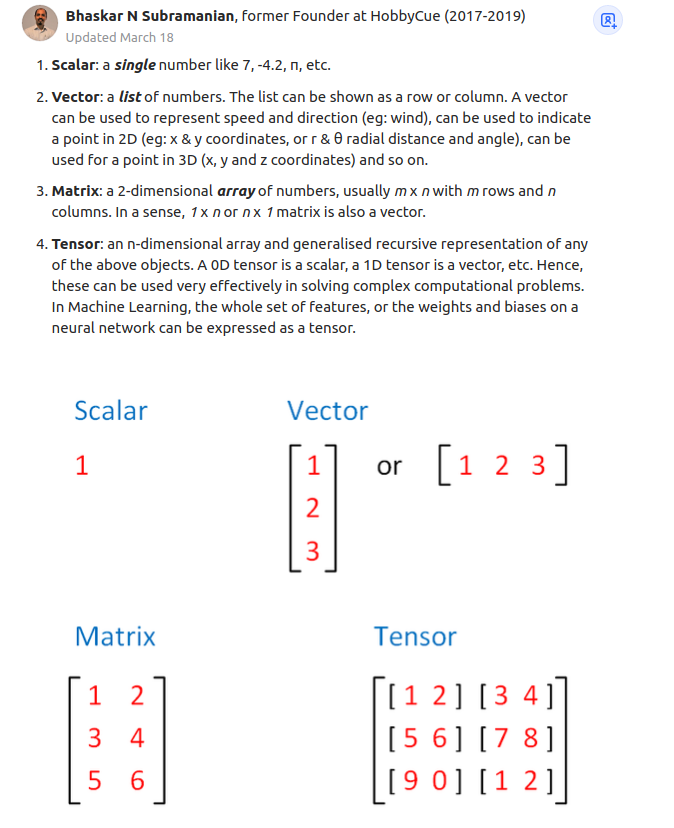array = 

### Tensor creation

Let's get started with tensors in PyTorch. The framework supports eight different types 

- 3 float types (16-bit, 32-bit, 64-bit): `torch.FloatTensor` is the class name for the commonly used 32-bit tensor.
- 5 integer types (signed 8-bit, unsigned 8-bit, 16-bit, 32-bit, 64-bit): common tensors of these types are the 8-bit unsigned tensor `torch.ByteTensor` and the 64-bit `torch.LongTensor`.


There are three fundamental ways to create tensors in PyTorch 

- Call a tensor constructor of a given type, which will create a non-initialized tensor. So we then need to fill this tensor later to be able to use it.
- Call a built-in method in the `torch` module that returns a tensor that is already initialized.
- Use the PyTorch–NumPy bridge.

#### Calling the constructor

Let's first create a 2 x 3 dimensional tensor of the type `float`:

In [ ]:
t = torch.FloatTensor(2, 3)

print(t)
print(t.size())

In [ ]:
t.shape

The constructor method allocates space in memory for this tensor. However, the tensor is *non-initialized*. In order to initialize it, we need to call any of the tensor initialization methods of the basic tensor types. For example, the tensor we just created has a built-in method `zero_()`:

The underscore after the method name is important: it means that the operation happens _in place_: the returned object is the same object but now with different content. 


In [ ]:
t.zero_()

In [ ]:
torch.ones(4)



Same as Numpy, when we have available the content we want to put in the tensor in the form of a Python iterable. In this case, we just pass it as the argument to the constructor:

In [ ]:
torch.FloatTensor([[1, 2, 3], [4, 5, 6]])

#### Calling a method in the torch module

A very convenient way to create tensors, in addition to using the constructor method, is to use one of the multiple methods provided in the `torch` module. In particular, the `tensor` method allows us to pass a number or iterable as the argument to get the appropriately typed tensor:

In [ ]:
tl = torch.tensor([1, 2, 3])
t = torch.tensor([1., 2., 3.])
print("A 64-bit integer tensor: {}, {}".format(tl, tl.type()))
print("A 32-bit float tensor: {}, {}".format(t, t.type()))

We can create a similar 2x3 tensor to the one above by using the `torch.zeros()` method, passing a sequence of dimensions to it: 

In [ ]:
t = torch.zeros(2, 3)
print(t)

There are many methods for creating tensors. We list some useful ones:

In [ ]:
torch.empty(2, 3)

In [ ]:
t_zeros = torch.zeros_like(t)        # zeros_like returns a new tensor
t_ones = torch.ones(2, 3)            # creates a tensor with 1s
t_fives = torch.empty(2, 3).fill_(5) # creates a non-initialized tensor and fills it with 5
t_random = torch.rand(2, 3)          # creates a uniform random tensor
t_normal = torch.randn(2, 3)         # creates a normal random tensor

print(t_zeros)
print(t_ones)
print(t_fives)
print(t_random)
print(t_normal)

We now see emerging two important paradigms in PyTorch. The _imperative_ approach to performing operations, using _inplace_ methods, is in marked contrast with an additional paradigm also used in PyTorch, the _functional_ approach, where the returned object is a copy of the original object. Both paradigms have their specific use cases as we will be seeing below. The rule of thumb is that _inplace_ methods are faster and don't require extra memory allocation in general, but they can be tricky to understand (keep this in mind regarding the computational graph that we will see below). _Functional_ methods make the code referentially transparent, which is a highly desired property that makes it easier to understand the underlying math, but we rely on the efficiency of the implementation:

In [ ]:
# creates a new copy of the tensor that is still linked to 
# the computational graph (see below)

t1 = torch.clone(t)
print(id(t))
print(id(t1))
# assert id(t) != id(t1), 'Functional methods create a new copy of the tensor'


# t1 = t
# print(id(t))
# print(id(t1))
# assert id(t) != id(t1), 'Functional methods create a new copy of the tensor'

# To create a new _independent_ copy, we do need to detach 
# from the graph
t1 = torch.clone(t).detach()

#### Using the PyTorch–NumPy bridge

A quite useful feature of PyTorch is its almost seamless integration with NumPy, which allows us to perform operations on NumPy and interact from PyTorch with the large number of NumPy libraries as well. Converting a NumPy multi-dimensional array into a PyTorch tensor is very simple: we only need to call the `tensor` method with NumPy objects as the argument:

In [ ]:
# Create a new multi-dimensional array in NumPy with the np datatype (np.float32)
a = np.array([1., 2., 3.])

# Convert the array to a torch tensor
t = torch.tensor(a)

print("NumPy array: {}, type: {}".format(a, a.dtype))
print("Torch tensor: {}, type: {}".format(t, t.dtype))

We can also seamlessly convert a PyTorch tensor into a NumPy array:

In [ ]:
t.numpy()

#### Indexing



Indexing works as expected with NumPy:

In [ ]:
t = torch.randn(2, 3)
t[ : , 0]

PyTorch also supports indexing using long tensors, for example:

In [ ]:
t = torch.randn(5, 6)
print(t)
i = torch.tensor([1, 3])
j = torch.tensor([4, 5])
print(t[i])                          # selects rows 1 and 3
print(t[i, j])                       # selects (1, 4) and (3, 5)

### Operations on tensors

Now that we know how to create tensors, let's create some of the fundamental tensors and see some common operations on them:

In [ ]:
# Scalars =: creates a tensor with a scalar 
# (zero-th order tensor,  i.e. just a number)
s = torch.tensor(42)
print(s)

**Tip**: a very convenient to access scalars is with `.item()`:

In [ ]:
s.item()

#### Matrix operation

Let's see higher-order tensors – remember we can always inspect the dimensionality of a tensor using the `.size()` method:

In [ ]:
# Row vector
x = torch.randn(1,3)
print("Row vector\n{}\nwith size {}".format(x, x.size()))

# Column vector
v = torch.randn(3,1)
print("Column vector\n{}\nwith size {}".format(v, v.size()))

# Matrix
A = torch.randn(3, 3)
print("Matrix\n{}\nwith size {}".format(A, A.size()))

A common operation is matrix-vector multiplication (and in general tensor-tensor multiplication). For example, the product $\mathbf{A}\mathbf{v} + \mathbf{b}$ is as follows:

In [ ]:
#@title
u = torch.matmul(A, v)
print(u, u.shape) # [3, 1]
b = torch.randn(3, 1)
y = u + b
print(y)

# or you can use torch.add()
print(torch.add(u, b))

where we retrieve the expected result (a column vector of dimensions 3x1). We can of course compose operations:

In [ ]:
s = torch.matmul(x, torch.matmul(A, v))
print(s.item()) 

#### Matmul vs. Mul

In [ ]:
m1 = torch.FloatTensor([[1, 2],
                        [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1.matmul(m2)) # 2 x 1

m1 = torch.FloatTensor([[1, 2],
                        [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1 * m2) # 2 x 2 # asterisk
print(m1.mul(m2))

#### others

There are many functions implemented for every tensor, and we encourage you to study the documentation. Some of the most common ones:

In [ ]:
# common tensor methods (they also have the counterpart in 
# the torch package, e.g. as torch.sum(t))
t = torch.randn(2,3)
t.sum(dim=0)                 
t.t()                   # transpose
t.numel()               # number of elements in tensor
t.nonzero()             # indices of non-zero elements


# operations in the package
torch.arange(0, 10)     # tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
torch.eye(3, 3)         # creates a 3x3 matrix with 1s in the diagonal (identity in this case)
t = torch.arange(0, 3)

### Reshaping (view)

In [ ]:
import torch
import numpy as np

t = np.arange(12).reshape(-1, 2, 3)

In [ ]:
t.shape

In [ ]:
t

In [ ]:
floatt = torch.FloatTensor(t)
# torch.tensor(t)
floatt.shape

In [ ]:
floatt.view([-1, 3]).shape

flatten

In [ ]:
flattened = floatt.flatten()
print(flattened)

something more

In [ ]:
t = torch.tensor(np.arange(6))

In [ ]:
t = torch.randn(2,3)
t.flatten()

In [ ]:
# print(t.view(-1, 2))           # reorganizes the tensor to these dimensions

# print(t.unsqueeze(1))          # inserts a dimension
# print(t.unsqueeze(1).squeeze())             # removes size 1 dimensions

print(t)

# print(torch.cat((t, t)))       # tensor([0, 1, 2, 0, 1, 2])
print(torch.stack((t, t)))     # tensor([[0, 1, 2],
                               #         [0, 1, 2]])